In [85]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
import sklearn.preprocessing as preprocessing


In [86]:
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")
df_data = df_train.append(df_test)
df_data.reset_index(inplace=True,drop=True)

In [87]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Text(0.5, 1.0, 'train feature corr')

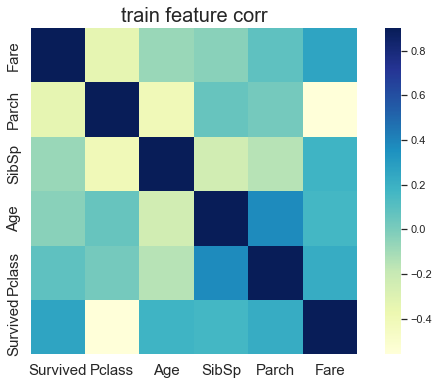

In [88]:
sns.set(context="paper", font="monospace")
sns.set(style="white")
f, ax = plt.subplots(figsize=(10,6))
data_corr = df_data.drop('PassengerId',axis=1).corr()
sns.heatmap(data_corr, ax=ax, vmax=.9, square=True,cmap='YlGnBu')
ax.set_xticklabels(data_corr.index, size=15)
ax.set_yticklabels(data_corr.columns[::-1], size=15)
ax.set_title('train feature corr', fontsize=20)

<AxesSubplot:xlabel='Sex', ylabel='count'>

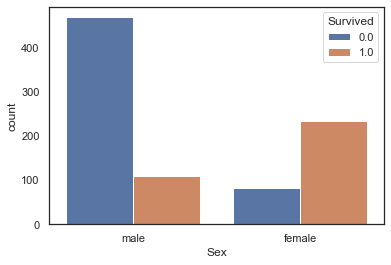

In [89]:
sns.countplot(df_data['Sex'], hue=df_data['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

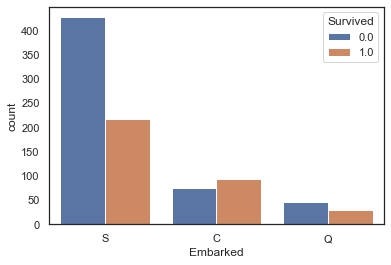

In [90]:
sns.countplot(df_data['Embarked'], hue=df_data['Survived'])

<AxesSubplot:ylabel='Fare'>

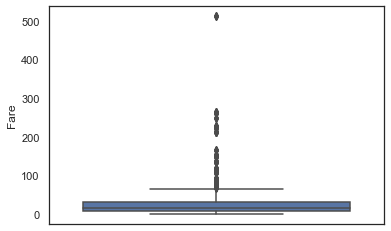

In [91]:
sns.boxplot(y=df_data['Fare'])

In [92]:
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(df_data['Fare'].values.reshape(-1, 1))
df_data['Fare'] = scaler.transform(df_data['Fare'].values.reshape(-1, 1))

In [93]:
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].median())

In [94]:
df_data['Embarked'] = df_data['Embarked'].fillna('S')

In [95]:
df_data['Family'] = df_data['Parch'] + df_data['SibSp']

In [96]:
df_data['Sex'] = df_data['Sex'].astype('category').cat.codes
df_data['Embarked'] = df_data['Embarked'].astype('category').cat.codes

In [97]:
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [100]:
select_feat = ['Sex','Pclass','Embarked','Family']
selector = RandomForestClassifier(n_estimators=250,criterion='entropy',min_samples_split=20)
selector.fit(X[select_feat], Y)
print(selector)

RandomForestClassifier(criterion='entropy', min_samples_split=20,
                       n_estimators=250)


In [101]:
submit_x = df_test.drop(labels=['PassengerId'],axis=1)

connect_pred = selector.predict(submit_x[select_feat])

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":connect_pred.astype(int)})
submit.to_csv("submit.csv",index=False)
